# Matrix Determinants
by: Alex Shmakov

In [1]:
from utils import * # imports everything we need and sets up notebook

## Inversions

Given a permutation of a set of numbers, for example 5423, the number of inversions is the number of times a larger number **precedes** a smaller number.

inversions of 5423 = { **54**23 , **5**4**2**3 , **5**42**3** , 5**42**3 , 5**4**2**3** }

As you can see, 5423 has 5 possible inversions in it.

In [2]:
# A quifkc function for finding how many inversions an array containing a permutation has.
def find_inversions(perm):
    count = 0
    for index, i in enumerate(perm):
        for j in perm[index+1:]:
            if i > j:
                count += 1
    return count

In [3]:
find_inversions([5,4,2,3])

## Determinants

A determinant is a value that can be derived from a matrix. A determinant can only be take on a **Square Matrix** and holds many special properies. 

### Determinants of a 2x2 matrix

Take a general 2x2 matrix:

\begin{bmatrix}
a_{11} & a_{12}\\ 
a_{21} & a_{22}
\end{bmatrix}

This matrix consists of multiplying the terms $a_{1j_1}*a_{2j_2}$

In order to find the **possble products** of this matrix, find the permutations of a set of number equal to the dimensions:

$$2x2 : n = 2 \\
n! = 2! = 2 \\
(j_1 , j_2) = \left\{ (1,2), (2,1)\right\}
$$

The products of the above matrix would be:

$$a_{11}a_{22} \:\:and\:\: a_{12}a_{21}$$

In order to determine the **sign of each product**, find the number of inversions on its permutation. If the product has an odd number of inversions, it is negative, otherwise, it is positive.

(1,2) has 0 inversions : even : +  
(2,1) has 1 inversion  : odd  : -

Finally, sum all of the products together with their appropriate signs in order to get the determinant. For our matrix, this would be:

$$\begin{vmatrix}
a_{11} & a_{12}\\ 
a_{21} & a_{22}
\end{vmatrix} = a_{11}a_{22} - a_{12}a_{21}$$

Time to write some code!

In [4]:
def determinant_2d(mat):
    return (mat[0,0] * mat[1,1]) - (mat[0,1] * mat[1,0])

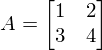

In [5]:
A = matrix([[1,2], [3,4]])
mat_print(A, 'A')

In [6]:
determinant_2d(A)

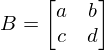

In [7]:
B = sympy.Matrix([[symbol('a'), symbol('b')], [symbol('c'), symbol('d')]])
mat_print(B, 'B')

In [8]:
determinant_2d(B)

### 3x3 Matrices and above

The same process we used to find the products for a 2x2 matrix applies for a 3x3 matrix:

$$
3x3 : n = 3 \\
n! = 3! = 6 \\
$$


In [9]:
permutations([1,2,3])

array([[1, 2, 3],
       [1, 3, 2],
       [2, 1, 3],
       [2, 3, 1],
       [3, 1, 2],
       [3, 2, 1]])

This gives us our set of permutations for the prodcut of $a_{1j_1}*a_{2j_2}*a_{3j_3}$ for a 3x3 matrix:
$$(j_1 , j_2, j_3) = \left\{ (1, 2, 3), (1, 3, 2), (2, 1, 3), 
                             (2, 3, 1), (3, 1, 2), (3, 2, 1)\right\}$$
                             
Now to find out the sign of each of these 



In [10]:
for perm in permutations([1,2,3]):
    inverses = find_inversions(perm)
    print('{} has {} inversions, product is {}'
          .format(perm, inverses, 'positive' if is_even(inverses) else 'negative'))

[1 2 3] has 0 inversions, product is positive
[1 3 2] has 1 inversions, product is negative
[2 1 3] has 1 inversions, product is negative
[2 3 1] has 2 inversions, product is positive
[3 1 2] has 2 inversions, product is positive
[3 2 1] has 3 inversions, product is negative


Using this information we can determing that the formula for finding the determinant of a 3x3 matrix to be:
$$\begin{vmatrix}
a_{11} & a_{12} & a_{13}\\ 
a_{21} & a_{22} & a_{23}\\ 
a_{31} & a_{32} & a_{33}\\
\end{vmatrix} = a_{11}a_{12}a_{13} - a_{11}a_{13}a_{12} - a_{12}a_{11}a_{13} 
+ a_{12}a_{13}a_{11} + a_{13}a_{11}a_{12} - a_{13}a_{12}a_{11}$$

Here I create a function for finding the determinant using this method for a matrix of any size.

In [11]:
def determinant_any(m):
    n_dim = m.shape[0]
    perms = array([[perm, 1 if is_even(find_inversions(perm)) else -1] # Create array of permutations and their multipliers
                   for perm in permutations(arange(1, n_dim+1, 1), True)])
    determinant = 0.0
    for permutation in perms: # for every permutation
        determinant += (permutation[1] * # multiplier of given permutation (either 1 or -1) times #
                        prod([m[j, permutation[0][j]-1] for j in xrange(n_dim)])) # product of every a_{nj_n}
    return determinant

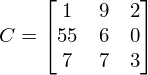

In [12]:
C = matrix([[1,9,2], [55,6,0], [7,7,3]])
mat_print(C, 'C')

In [13]:
determinant_any(C)

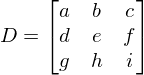

In [14]:
D = sympy.Matrix([[symbol('a'), symbol('b'), symbol('c')], 
                  [symbol('d'), symbol('e'), symbol('f')],
                  [symbol('g'), symbol('h'), symbol('i')]])
mat_print(D, 'D')

In [15]:
determinant_any(D)

This process can be continued *ad infinitum*, although it gets more and more convoluted as the matrix increases in size.

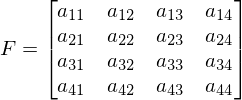

In [16]:
# A general 4x4 matrix
F = sympy.Matrix([[symbol('a_{11}'), symbol('a_{12}'), symbol('a_{13}'), symbol('a_{14}')], 
                  [symbol('a_{21}'), symbol('a_{22}'), symbol('a_{23}'), symbol('a_{24}')],
                  [symbol('a_{31}'), symbol('a_{32}'), symbol('a_{33}'), symbol('a_{34}')],
                  [symbol('a_{41}'), symbol('a_{42}'), symbol('a_{43}'), symbol('a_{44}')]])
mat_print(F, 'F')

In [17]:
determinant_any(F) # oh my

## Cofactor Expansion

When dealing with large matrices, it is often much better to break down the large calculations seen above into smaller calculations. In order to do this, we use cofactor expansion. We can essentially split a matrix into multiple parts by elminating certain rows or columns.

$$ A = \begin{bmatrix}
1 & 4 & -5 & 6\\ 
3 & 5 & 2 & 0\\ 
1 & 1 & 8 & 6\\ 
4 & 5 & 6 & 7
\end{bmatrix}$$

$$Eliminate \left [Row\>2, Column\>3 \right ] \rightarrow  \begin{bmatrix}
1 & 4 & \left [-5  \right ] & 6\\ 
\left [3  \right ] & \left [5  \right ] & \left [2  \right ] & \left [0  \right ]\\ 
1 & 1 & \left [8  \right ] & 6\\ 
4 & 5 & \left [6  \right ] & 7
\end{bmatrix}$$

$$C_{23} = \begin{bmatrix}
1 & 4 & 6\\ 
1 & 1 & 6\\ 
4 & 5 & 7
\end{bmatrix}$$

You can use these minor matrices in order to find the determinant of A. The determinant is found using this formula:

$$\left |A  \right | = \sum (-1)^{i+j}a_{ij}\left |C_{ij}  \right |$$

Choose either a row $(i)$ or a column $(j)$ and iterate across that entire row or column.

For example, for the above matrix A, we decide $i$ to be $1$.

$$\left |A  \right | = (-1)^{1+1}a_{11}\left | C_{11}  \right | + (-1)^{1+2}a_{12}\left | C_{12}  \right | + (-1)^{1+3}a_{13}\left | C_{13}  \right | + (-1)^{1+4}a_{14}\left | C_{14}  \right |$$

$$\left |A  \right | 
= (-1)^{2}(1)\begin{vmatrix}
5 & 2 & 0\\ 
1 & 8 & 6\\ 
5 & 6 & 7
\end{vmatrix} 
+ (-1)^{3}(4)\begin{vmatrix}
3 & 2 & 0\\ 
1 & 8 & 6\\ 
4 & 6 & 7
\end{vmatrix} 
+ (-1)^{4}(-5)\begin{vmatrix}
3 & 5 & 0\\ 
1 & 1 & 6\\ 
4 & 5 & 7
\end{vmatrix}
+ (-1)^{5}(6)\begin{vmatrix}
3 & 5 & 2\\ 
1 & 1 & 8\\ 
4 & 5 & 6
\end{vmatrix}$$

$$
\left |A  \right | 
= 1\begin{vmatrix}
5 & 2 & 0\\ 
1 & 8 & 6\\ 
5 & 6 & 7
\end{vmatrix} 
- 4\begin{vmatrix}
3 & 2 & 0\\ 
1 & 8 & 6\\ 
4 & 6 & 7
\end{vmatrix} 
- 5\begin{vmatrix}
3 & 5 & 0\\ 
1 & 1 & 6\\ 
4 & 5 & 7
\end{vmatrix}
- 6\begin{vmatrix}
3 & 5 & 2\\ 
1 & 1 & 8\\ 
4 & 5 & 6
\end{vmatrix}$$

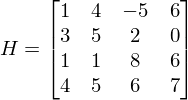

In [18]:
# Lets remake the matrix we saw above
H = matrix([[1,4,-5,6], [3,5,2,0], [1,1,8,6], [4,5,6,7]])
mat_print(H, 'H')

In [19]:
# First, to prove that it works, lets manually do the equation we found at the end of the last section
(determinant_any(matrix([[5,2,0], [1,8,6], [5,6,7]])) 
- 4*determinant_any(matrix([[3,2,0], [1,8,6], [4,6,7]])) 
- 5*determinant_any(matrix([[3,5,0], [1,1,6], [4,5,7]]))
- 6*determinant_any(matrix([[3,5,2], [1,1,8], [4,5,6]])))

In [20]:
determinant_any(H) # It checks out!

In [21]:
# This function searches through an array to find the minor matricies for a given row or column.
# This function returns an array of [C_{ij}, a_{ij}, (-1)^(i+j)]
def find_minor_matricies(m, column = False, i = 1):
    n_dim = m.shape[0]
    minors = []
    i -= 1
    if not column:
        for j in xrange(n_dim):
            minors.append(array([delete(delete(m, i, 0), j, 1), m[i, j], (-1)**(i+j)]))
    else:
        j = i
        i = None
        for i in xrange(n_dim):
            minors.append(array([delete(delete(m, i, 0), j, 1), m[i, j], (-1)**(i+j)]))
    return array(minors)

In [22]:
# Lets look at the minor matrices of our above matrix
print(find_minor_matricies(H)[:, 0]) # Checks out

[matrix([[5, 2, 0],
        [1, 8, 6],
        [5, 6, 7]])
 matrix([[3, 2, 0],
        [1, 8, 6],
        [4, 6, 7]])
 matrix([[3, 5, 0],
        [1, 1, 6],
        [4, 5, 7]])
 matrix([[3, 5, 2],
        [1, 1, 8],
        [4, 5, 6]])]


In [23]:
# Lets check our function by testing matrix H 
sum([ (determinant_any(minor_mat)*factor*sign) for minor_mat, factor, sign in find_minor_matricies(H)])

## Special Properties of determinants

### Using determinants to find Area

You can use the determinant of a 2x2 matrix holding the coordinates of a quadrilateral with one point on the origin using the equation 

$$A_{quadrilateral} = \begin{Vmatrix}
x_1 & x_2\\ 
y_1 & y_2
\end{Vmatrix}$$

Similarly, you can find the area of a triangle using the formula 

$$A_{triangle} = \frac{1}{2}\begin{Vmatrix}
x_1 & y_1 & 1\\ 
x_2 & y_2 & 1\\ 
x_3 & y_3 & 1 
\end{Vmatrix}$$ 

### Transposition and inversion

When **trasnposing** a matrix, the determinant **does not change**:

$$A = \begin{bmatrix}
1 & 2 & 3\\ 
4 & 5 & 0\\ 
3 & 1 & 2
\end{bmatrix}, \>A^T = \begin{bmatrix}
1 & 4 & 3\\ 
2 & 5 & 1\\ 
3 & 0 & 2
\end{bmatrix}$$

$$\left | A \right | = -39 = \left |A^T  \right |$$

When **inversing** a matrix, the determinant becomes the **multiplicitive inverse** of the original determinant:

$$\left | A \right | =(\left | A^{-1} \right |)^{-1} = \frac{1}{\left | A^{-1} \right |}$$

### Interchanging rows and columns

When you **switch around two rows or columns** of a matrix, the determinant **flips signs**:

$$\left |A \right | = \begin{vmatrix}
1 & 2 & 3\\ 
4 & 5 & 0\\ 
3 & 1 & 2
\end{vmatrix}$$

$$\left |A(R_1 \leftrightarrow R_3)  \right | = \begin{vmatrix}
3 & 1 & 2\\ 
4 & 5 & 0\\ 
1 & 2 & 3
\end{vmatrix}$$

$$\left |A \right | = -39 \\
\left |A(R_1 \leftrightarrow R_3) \right | = 39
$$

   Therefore, the sign of the new determinant is equal to $(-1)^n$, where n is the amount of times you interchanged rows or columns
   
### Multiplications and Combinations

Multiplying a row or column of a matrix will **multiply the determinant by the same factor**:

$$\left |A \right | = \begin{vmatrix}
1 & 2 & 3\\ 
4 & 5 & 0\\ 
3 & 1 & 2
\end{vmatrix}$$

$$\left |A(5R_1 \rightarrow R_1)  \right | = \begin{vmatrix}
5 & 10 & 15\\ 
4 & 5 & 0\\ 
3 & 1 & 2
\end{vmatrix}$$

$$\left |A \right | = -39 \\
\left |A(5R_1 \rightarrow R_1) \right | = 5*-39 = -195
$$

Adding a multiple of a row or column to another row or column will **not change the determinant**:

$$\left |A \right | = \begin{vmatrix}
1 & 2 & 3\\ 
4 & 5 & 0\\ 
3 & 1 & 2
\end{vmatrix}$$

$$\left |A(2R_1 + R_2 \rightarrow R_2)  \right | = \begin{vmatrix}
1 & 2 & 3\\ 
6 & 9 & 6\\ 
3 & 1 & 2
\end{vmatrix}$$

$$\left |A \right | = -39 \\
\left |A(2R_1 + R_2 \rightarrow R_2) \right | = -39$$

### Zero Determinants

When an entire row or column has 0s, the determinant of the matrix is 0:

$$\begin{vmatrix}
1 & 3 & 5\\ 
 1&  21& 7\\ 
 0&0  & 0
\end{vmatrix} = 0$$

Furthermore, if one of the rows/columns is the same as another row/column, the determinant is zero:

$$\begin{vmatrix}
5 & 1 & 7 & 1\\ 
 3&  13&  9& 9\\ 
 0&  2&  7& 7\\ 
 3&  13&  9& 9
\end{vmatrix} = 0$$

### Determinants of triangular matricies


A trianglualr matrix is one defined as having all zeroes either above or below the main diagonal. The determinant of a diagonal matrix is found by simply multiplying the terms of the main diagonal:

$$\begin{vmatrix}
5 & 1 & 7 & 1\\ 
 0&  13&  9& 9\\ 
 0&  0&  7& 7\\ 
 0 &  0&  0& 9
\end{vmatrix} = 5*13*7*9 = 4095$$

For a reverse diagonal matrix, the rules are pretty much the same except the sign of the determinant is flipped if the size of the matrix is not a multiple of 4 or 1 grater than a multiple of 4 $(4n\>or\>4n+1)$

When finding matricies, it is often best to transform the matrix into a diagonal matrix in order to minimuze the calculation time. However, when doing so, you must keep track of the changes these changes make to the determinant, as explained in the sections above.


Lets look at some proofs of these properties

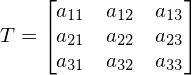

In [24]:
# Here we make a general 3x3 matrix
T = matrix([symbol('a_{11} a_{12} a_{13}'), 
            symbol('a_{21} a_{22} a_{23}'), 
            symbol('a_{31} a_{32} a_{33}')])
mat_print(T, 'T')

In [25]:
determinant_any(T) # The original determinant

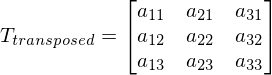

In [26]:
mat_print(T.transpose(), 'T_{transposed}')

In [27]:
# The determinant of the transposed matrix, as you can see it is the same as the original
determinant_any(T.transpose())

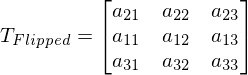

In [28]:
T[[0, 1],:] = T[[1, 0],:] # Flip Rows One and Two
mat_print(T, 'T_{Flipped}')

In [29]:
determinant_any(T) # As you can see, it is the negative of the original determinant

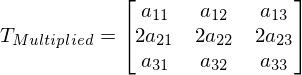

In [30]:
T[[1, 0],:] = T[[0, 1],:] # Undo previous operation
T[1, :] = T[1, :]*2 # Multiply the second row of the matrix by a factor of 2
mat_print(T, 'T_{Multiplied}')

In [31]:
# The determinant of the factored matrix, as you can see, it is a multiple of the orignal
sympy.factor(determinant_any(T))

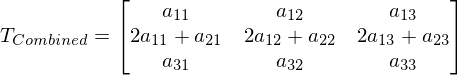

In [32]:
T[1, :] = T[1, :]/2 # Undo our previous operation
T[1, :] += T[0, :]*2 # Add 2*R_1 to Row 2
mat_print(T, 'T_{Combined}')

In [33]:
# The determinant of the combined matrix, as you can see, it is the same as the original
sympy.factor(determinant_any(T))

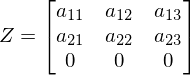

In [34]:
# Here we create a matrix where the entire bottom row is 0s
Z = matrix([symbol('a_{11} a_{12} a_{13}'), 
            symbol('a_{21} a_{22} a_{23}'), 
            [0,0,0]])
mat_print(Z, 'Z')

In [35]:
determinant_any(Z) # Since an entire row or column is 0, the determinant is 0.

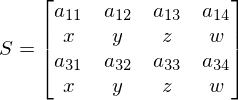

In [36]:
# Here we create a matrix where the 2nd and 4th rows are identical
S = matrix([symbol('a_{11} a_{12} a_{13} a_{14}'),
            symbol('x y z w'),
            symbol('a_{31} a_{32} a_{33} a_{34}'),
            symbol('x y z w')])
mat_print(S, 'S')

In [37]:
determinant_any(S) # As you can see, the determinant is 0

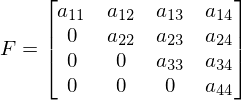

In [38]:
# A general 4x4 lower diagonal matrix
F = sympy.Matrix([[symbol('a_{11}'), symbol('a_{12}'), symbol('a_{13}'), symbol('a_{14}')], 
                  [0, symbol('a_{22}'), symbol('a_{23}'), symbol('a_{24}')],
                  [0, 0, symbol('a_{33}'), symbol('a_{34}')],
                  [0, 0, 0, symbol('a_{44}')]])
mat_print(F, 'F')

In [39]:
determinant_any(F) # The detminant is just the product of the diagonal terms

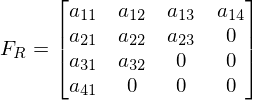

In [40]:
# A general 4x4 reverse lower diagonal matrix
F_R = sympy.Matrix([[symbol('a_{11}'), symbol('a_{12}'), symbol('a_{13}'), symbol('a_{14}')], 
                  [symbol('a_{21}'), symbol('a_{22}'), symbol('a_{23}'), 0],
                  [symbol('a_{31}'), symbol('a_{32}'), 0, 0],
                  [symbol('a_{41}'), 0, 0, 0]])
mat_print(F_R, 'F_R')

In [41]:
determinant_any(F_R)# Since 4x4 is divisible by 4, the determinant is the positive product of the diagonal

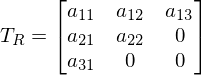

In [42]:
T_R = matrix([[symbol('a_{11}'), symbol('a_{12}'), symbol('a_{13}')], 
            [symbol('a_{21}'), symbol('a_{22}'), 0], 
            [symbol('a_{31}'), 0, 0]])
mat_print(T_R, 'T_R')

In [43]:
determinant_any(T_R) # 3 is not divisble by 4, so the determinant is the negative product of the diagonal

## Using Determinants to Find Inverses

### The Adjoint of a Matrix

The adjoint of a matrix is the transposition of an array of the determinants of the minor matricies.

For a 4x4 matrix, the adjoint is defined as the following:

$$adj(A) = \begin{bmatrix}
C_{11} & C_{21} & C_{31} & C_{41}\\ 
C_{12} & C_{22} & C_{32} & C_{42}\\ 
C_{13} & C_{23} & C_{33} & C_{43}\\ 
C_{14} & C_{24} & C_{34} & C_{44}
\end{bmatrix}$$

In [44]:
def matrix_adjoint(m):
    n_dim = m.shape[0]
    minors = [find_minor_matricies(m, False, row+1)[:, 2]*find_minor_matricies(m, False, row+1)[:, 0] 
              for row in xrange(n_dim)]
    minor_det = matrix([[determinant_any(minor) for minor in min_set] for min_set in minors])
    return minor_det.transpose()

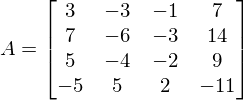

In [45]:
A = matrix([[3, -3, -1, 7], 
            [7, -6, -3, 14],
            [5, -4, -2, 9],
            [-5, 5, 2, -11]])
mat_print(A, 'A')

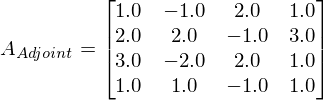

In [46]:
mat_print(matrix_adjoint(A), 'A_{Adjoint}')

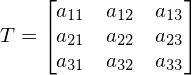

In [47]:
# A general 3x3 matrix
T = matrix([symbol('a_{11} a_{12} a_{13}'), 
            symbol('a_{21} a_{22} a_{23}'), 
            symbol('a_{31} a_{32} a_{33}')])
mat_print(T, 'T')

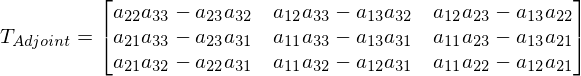

In [48]:
mat_print(matrix_adjoint(T), 'T_{Adjoint}')

### Defining the Inverse of a Matrix in Terms of Determinant

The invers of a square matrix A $(A^{-1})$ can be defined in terms of the adjoint of matrix A and the determininat of matrix A:

$$A^{-1} = \frac{adj(A)}{\left |A  \right |}$$

Therefore, in order for the inverse of a square matrix to exist, the determinant of A **must not be 0**.

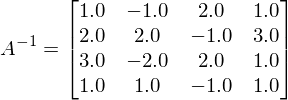

In [49]:
mat_print(matrix_adjoint(A) / determinant_any(A), 'A^{-1}')

## Cramer's Rule

We can use determinants and Cramers Rule in order to find solutions to linear systems of equations. Take, for example, the given system:

$$\left\{\begin{matrix}2x-3y+z = 11
\\ x+4y-3z = -3
\\ 4x - 5y + 3z = 19
\end{matrix}\right.$$

$$A = \begin{bmatrix}
2 & -3 & 1\\ 
1 & 4 & -2\\ 
4 & -5 & 3
\end{bmatrix} , x = \begin{bmatrix}x
\\ y
\\ z
\end{bmatrix} , b = \begin{bmatrix}11
\\ -3
\\ 19
\end{bmatrix}$$

We can then split matrix A into 3 extra matricies by substituting one of the columns in A with b, this represents the matrix for the variable that column represented.

$$A_x = \begin{bmatrix}
11 & -3 & 1\\ 
-3 & 4 & -2\\ 
19 & -5 & 3
\end{bmatrix}\\ A_y = \begin{bmatrix}
2 & 11 & 1\\ 
1 & -3 & -2\\ 
4 & 19 & 3
\end{bmatrix}\\ A_z = \begin{bmatrix}
2 & -3 & 11\\ 
1 & 4 & -3\\ 
4 & -5 & 19
\end{bmatrix}$$

We can use Cramer's rule to determine the value of each variable:

$$x = \frac{\left |A_x  \right |}{\left |A  \right |}, 
y = \frac{\left |A_y  \right |}{\left |A  \right |}, 
z = \frac{\left |A_z  \right |}{\left |A  \right |}$$

In [50]:
def solve_cramers_rule(m, b):
    n_var = m.shape[1]
    var_matricies = [copy(m) for i in xrange(n_var)]
    for i in xrange(n_var):
        var_matricies[i][:, i] = b
    det = determinant_any(m)
    return array([determinant_any(var_matrix) / det for var_matrix in var_matricies])

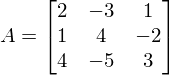

In [51]:
A = matrix([[2, -3, 1],
           [1, 4, -2],
           [4, -5, 3]])
mat_print(A, 'A')

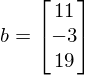

In [52]:
b = array([11, -3, 19])
mat_print(vstack(b), 'b')

In [53]:
solve_cramers_rule(A, b)

array([ 3., -2., -1.])